# 二叉树的层序遍历

## 1.二叉树的层序遍历

### 给一个二叉树，返回其按层序遍历得到的节点值。

* 例如：
    * 输入：`[3,9,20,null,null,15,7]`
    * 输出：`[[3],[9,20],[15,7]]`

需要借助一个辅助数据结构即队列来实现。队列先进先出，符合一层一层遍历的逻辑，而用栈先进后出适合模拟深度优先遍历也就是递归的逻辑。

#### 递归法

In [2]:
def levelOrder(root):
    res = []
    def helper(root, depth):
        if not root:
            return []
        if len(res) == depth:   # 开始当前深度
            res.append([])
        res[depth].append(root.val)   # 填充当前深度
        if root.left:
            helper(root.left, depth+1)   # 处理孩子节点
        if root.right:
            helper(root.right, depth+1)        
    helper(root, 0)
    return res

#### 迭代法

In [4]:
from collections import deque
def levelOrder(root):
    result = []
    if not root:
        return result
    que = deque([root])
    while que:
        size = len(que)
        res = []
        for _ in range(size):
            cur = que.popleft()   # 出队
            res.append(cur.val)
            if cur.left:
                que.append(cur.left)   # 将左节点加入队列
            if cur.right:
                que.append(cur.right)   # 将右节点加入队列
        result.append(res)
    return res

## 2.二叉树的层序遍历2

### 给定一个二叉树，返回其节点值自底向上的层次遍历。

* 例如：
    * 输入：`[3,9,20,null,null,15,7]`
    * 输出：`[[3],[9,20],[15,7]]`

In [7]:
from collections import deque
def levelOrder(root):
    result = []
    if not root:
        return result
    que = deque([root])
    while que:
        res = []
        size = len(que)
        for _ in range(size):
            cur = que.popleft()
            res.append(cur.val)
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
        result.append(res)
    return result[::-1]   # 对第一个层次遍历的结果进行逆序输出

## 3.二叉树的右视图

### 给定一棵二叉树，想象自己站在它的右侧，按照从顶部到底部的顺序，返回从右侧所能看到的节点值。

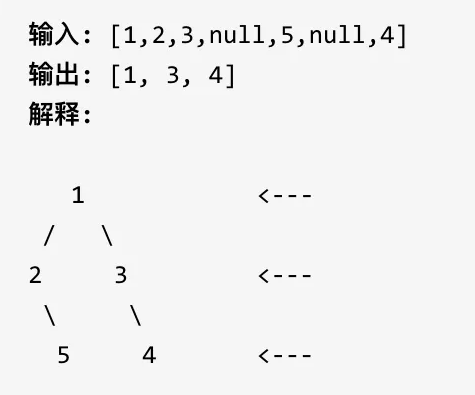

层序遍历的时候，判断是否遍历到单层的最后面的元素，如果是，放进result数组中。

In [9]:
from collections import deque
def solve(root):
    if not root:
        return []
    result = []
    que = deque([root])
    while que:
        size = len(que)
        for i in range(size):
            cur = que.popleft()    
            if i == size - 1:   # 将每层最后一个节点加入到result中
                result.append(cur.val)
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
    return result

## 4.二叉树的层平均值

### 给定一个非空二叉树，返回一个由每层节点平均值组成的数组。

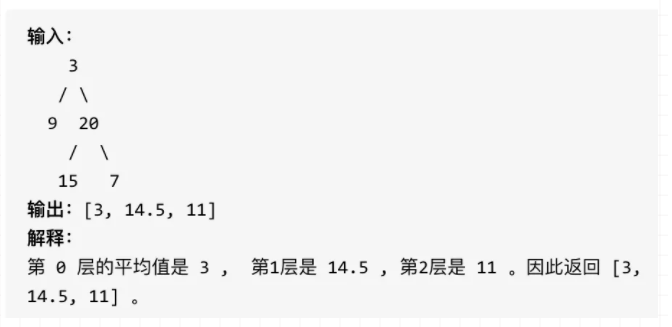

In [12]:
from collections import deque
def solve(root):
    if not root:
        return []
    result = []
    que = deque([root])
    while que:
        size = len(que)
        sums = 0.0
        for i in range(size):
            cur = que.popleft()    
            sums += cur.val
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
        result.append(sums / size)
    return result

## 5.N叉树的层序遍历

### 给定一个N叉树，返回其节点值的层序遍历。

只不过一个节点有多个孩子。

In [14]:
from collections import deque
def solve(root):
    if not root:
        return []
    result = []
    que = deque([root])
    while que:
        size = len(que)
        res = []
        for _ in range(size):
            cur = que.popleft()
            res.append(cur.val)
            for i in range(len(cur.children)):   # 处理多个孩子节点
                if cur.children[i]:
                    que.append(cur.children[i])
        result.append(res)
    return result

## 6.在每行树行中找最大值

### 在二叉树的每一行中找到最大值。

In [3]:
from collections import deque
def solve(root):
    if not root:
        return []
    result = []
    que = deque([root])
    while que:
        size = len(que)
        res = []
        for _ in range(size):
            cur = que.popleft()
            res.append(cur.val)
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
        result.append(max(res))
    return result

## 7. 填充每个节点的下一个右侧节点指针

### 给定一个完美二叉树，其所有叶子节点都在同一层，每个父结点都有两个子节点。二叉树的定义如下：

```c++
struct Node{
    int val;
    Node *left;
    Node *right;
    NOde *next;
}
```

### 填充它的每个next指针，让这个指针指向其下一个右侧节点。如果找不到下一个右侧节点，则将next指针设置为null。

In [7]:
def solve(root):
    if not root:
        return None
    que = [root]
    while que:
        size = len(que)
        for i in range(size):
            cur = que.pop(0)   # 第一个节点出队
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
            if i == size - 1:
                break
            cur.next = que[0]  # 指向同一层的下一个节点
    return root

## 8.填充每个节点的下一个右侧节点指针2

### 给定一个二叉树，填充它的每个右侧指针。

In [11]:
def solve(root):
    if not root:
        return None
    que = [root]
    while que:
        size = len(que)
        for i in range(size):
            cur = que.pop(0)
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
            if i == size - 1:
                break
        cur.next = que[0]
    return root

和第七题代码完全一样

## 9.二叉树的最大深度

### 给定一个二叉树，找出其最大深度。

#### 递归法

In [4]:
def levelOrder(root):
    # 使用后序遍历
    if root == None:
        return 0
    return 1 + max(levelOrder(root.left), levelOrder(root.right))

#### 迭代法

In [1]:
def solve(root):
    # 层次遍历
    if not root:
        return 0
    maxdepth = 0
    que = deque([root])
    while que:
        size = len(que)
        maxdepth += 1
        for i in range(size):
            cur = que.popleft()
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
    return maxdepth

## 10.N叉树的最大深度

#### 递归法

In [11]:
def levelOrder(root):
    # 使用后序遍历
    if root == None:
        return 0
    depth = 0
    for i in range(len(root.children)):
        depth = max(depth, self.maxDepth(root.children[i]))
    return depth + 1

#### 迭代法

In [6]:
def solve(root):
    if not root:
        return 0
    maxdepth = 0
    que = deque([root])
    while que:
        size = len(que)
        maxdepth += 1
        for i in range(size):
            cur = que.popleft()
            for i in range(len(cur.children)):
                if cur.children[i]:
                    que.append(cur.children[i])
    return maxdepth

## 11.二叉树的最小深度

### 只有当左右孩子都为空的时候，才遍历到最低点了。

##### 递归法

In [6]:
def mindepth(root):
    if root == None:
        return 0
    if root == None:
        return 0
    if not root.left and not root.right:
        return 1
    mindepth = 10**9
    # 左子树最小深度
    if root.left:
        mindepth = min(self.minDepth(root.left), mindepth)
    # 右子树最小深度
    if root.right:
        mindepth = min(self.minDepth(root.right), mindepth)
    return 1 + mindepth

In [5]:
def mindepth(root):
    if root == None:
        return 0
    leftdepth = mindepth(root.left)
    rightdepth = mindepth(root.right)
    # 当左子树为空，右子树不为空时，最低点在右子树上
    if root.left == None and root.right != None:
        return 1 + rightdepth
    # 当左子树不为空，右子树为空时，最低点在左子树上
    if root.left != None and root.right == None:
        return 1 + leftdepth
    # 两个子树都不为空，返回其最小深度
    return 1 + min(leftdepth, rightdepth)

##### 迭代法

In [14]:
def solve(root):
    if not root:
        return 0
    que = deque([root])
    mindepth = 0
    while que:
        size = len(que)
        mindepth += 1
        for i in range(size):
            cur = que.popleft()
            if cur.left:
                que.append(cur.left)
            if cur.right:
                que.append(cur.right)
            if cur.left == None and cur.right == None:
                return mindepth

### 题目

* 102.二叉树的层序遍历
* 107.二叉树的层次遍历II
* 199.二叉树的右视图
* 637.二叉树的层平均值
* 429.N叉树的前序遍历
* 515.在每个树行中找最大值
* 116.填充每个节点的下一个右侧节点指针
* 117.填充每个节点的下一个右侧节点指针II
* 104.二叉树的最大深度
* 111.二叉树的最小深度